In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [2]:
df=pd.read_csv('Black_friday_train.csv')

In [3]:
df.head()
df.shape

(550068, 12)

In [4]:
df_test=pd.read_csv('Black_friday_test.csv')
df_test.head()
#df_test.shape

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [5]:
pd.concat([df,df_test],axis=0)#Same as append

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [6]:
df_final=df.append(df_test)

In [7]:
df_final.shape

(783667, 12)

In [8]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [9]:
df_final.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
dtype: object

In [10]:
df_final.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [11]:
df_final.drop(['User_ID'],inplace=True,axis=1)

In [12]:
df_final.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [13]:
#Handling Gender categorical variable
df_final.replace({'Gender':{'F':0,'M':1}},inplace=True)#Female is 0 Male is 1
#We can also use df_final['Gender']=df_final['Gender'].map('F':0,'M':1)

In [14]:
df_final.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [15]:
#Handling Age categorical variable
df_final['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [22]:
#You can encode like this also
#But here comes the domain knowledge and shoping age on ecommerce website of 0-17 is very very less and for 18-25 and 26-45 will
#be more so we can give some ranks for them like 1,2,3,4,5 so model will give some priority to somthing and it is also know as
# target guiding
tem=pd.get_dummies(df_final['Age'])
tem['18-25'].value_counts()#change the category
#In get dummies method we drop first one of the columns because we take that as base case and it can be derived from other 
#categories and if retain and encode all n category than it will lead to multicolinearity problem in that case regression model
#will fail. So we will drop the first column after encoding

0    641714
1    141953
Name: 18-25, dtype: int64

In [23]:
df_final['Age']=df_final['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [29]:
df_final.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [28]:
#You can also use LabelEncoder also but it starts with the 0 thats the problem
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
temp=le.fit_transform(df_final['Age'])
temp

array([0, 0, 0, ..., 2, 4, 4], dtype=int64)

In [30]:
#Handling City Categorical variable
temp=pd.get_dummies(df_final['City_Category'],drop_first=True)

In [31]:
temp.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [34]:
df_final=pd.concat([df_final,temp],axis=1)

In [35]:
df_final.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [36]:
df_final=df_final.drop(columns=['City_Category'])

In [37]:
df_final.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


In [38]:
#Lets handle missing values
df_final.isnull().sum()
#Category 2 and 3 has several null values and purchase also have some null values but We combined test dataset also 
#there purchase is null and hence it is showing so no worried about Purchase null values

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [39]:
#Handling missing values in Product_Category_2
df_final['Product_Category_2'].value_counts()
#From thsi we can understand that this category is discrete categorical variable so best way to replace the null is the mode

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [43]:
df_final['Product_Category_2'].fillna(df_final['Product_Category_2'].mode()[0],inplace=True)

In [45]:
df_final['Product_Category_2'].isnull().sum()#So no null values

0

In [46]:
#Same for Product_Category_3 
df_final['Product_Category_3'].fillna(df_final['Product_Category_3'].mode()[0],inplace=True)

In [47]:
df_final['Product_Category_3'].isnull().sum()#So no null values

0

In [48]:
df_final['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [51]:
df_final.replace({'Stay_In_Current_City_Years':{'4+':4,'0':0,'1':1,'2':2,'3':3}},inplace=True)

In [52]:
df_final.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


C:\Users\p.a.hegde\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

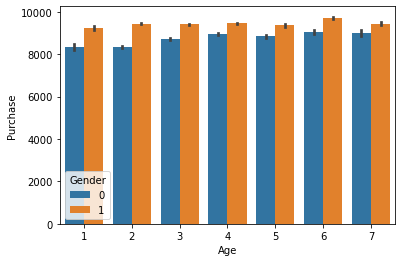

In [57]:
#Visualisation
sns.barplot('Age','Purchase',hue='Gender',data=df_final)

#### From above visualisation we can see that almost all category of age is purchased same amount and each category male is dominatiing Gender

C:\Users\p.a.hegde\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

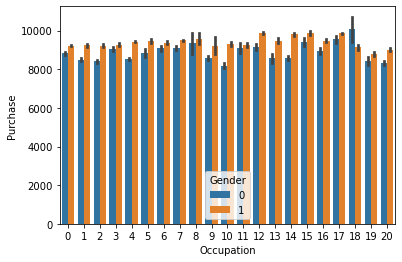

In [58]:
#Visualisation purchase vs occupation
sns.barplot('Occupation','Purchase',hue='Gender',data=df_final)

#### Here also almost all the occupation purchased same amount

C:\Users\p.a.hegde\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

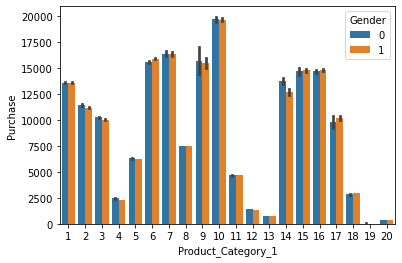

In [59]:
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=df_final)

#### Here we can observe that Product Category 10,9,6,7 14,15,16,17 are purchased more

C:\Users\p.a.hegde\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

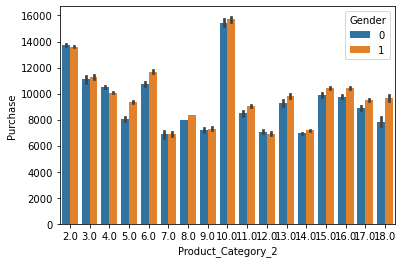

In [60]:
sns.barplot('Product_Category_2','Purchase',hue='Gender',data=df_final)

#### Product category 2 --> 10 is purchased the most

C:\Users\p.a.hegde\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

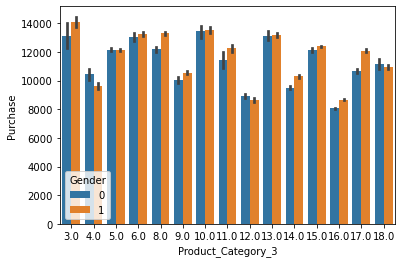

In [61]:
sns.barplot('Product_Category_3','Purchase',hue='Gender',data=df_final)

#### Product Category 3 ---> there is zig zag purchase graph we can see

In [64]:
df_test=df_final[df_final['Purchase'].isnull()]

In [65]:
df_test.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00128942,1,5,7,2,1,1,11.0,16.0,NaN,1,0
1,P00113442,1,3,17,0,0,3,5.0,16.0,NaN,0,1
2,P00288442,0,4,1,4,1,5,14.0,16.0,NaN,1,0
3,P00145342,0,4,1,4,1,4,9.0,16.0,NaN,1,0
4,P00053842,0,3,1,1,0,4,5.0,12.0,NaN,0,1


In [66]:
df_train=df_final[~df_final['Purchase'].isnull()]

In [67]:
df_train.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1
